In [1]:
#indepdent sdes implimentation 
import numpy as np
from model_2point import *




phiA= 0.5
phiB = 1-phiA
chi = 1.0
rho0 = 100.0
nx = 2
zA = 1.0
zB = 1.0
dt = 0.001

tmax = 1.0
zetalist = [0.0,0.001,0.01,0.1,1,10,100]

# Generate arrays of complex numbers
wplus = np.random.normal(0, 1, nx) + 0j * np.random.normal(0, 1, nx)
wplus = wplus-np.mean(wplus)
wminus = np.random.normal(0, 1, nx) + 0j * np.random.normal(0, 1, nx)
w0 = np.vstack((wplus,wminus)).T
lambda_plus = 1.0
lambda_minus = 1.0
# _model = model(chi,rho0,ensemble='grand')
# _model.init_grandcanonical(zA,zB)

ensemble = 'canonical'


_model = model(chi,rho0,ensemble=ensemble)
if ensemble == 'canonical':
    _model.init_canonical(phiA)
elif ensemble == 'grand':
    _model.init_grandcanonical(zA,zB)



#model.dHw(w)

model_list = [_model.dHdw_compressible,_model.dHdw_weakcompressible,_model.dHdw_incompressible]
lambdat = np.array([lambda_plus,lambda_minus])
wlist = []
corrlist = []
corrlist_tot = []
for base in model_list:
    sde = sde_int(w0,base,_model.wick,ensemble=ensemble)
    w,t, = sde.Euler_Maruyama(tmax,dt,lambdat,SCFT = False)
    corrlist.append(_model.getCorrelation_list(w))
    corrlist_tot.append(_model.getCorrelationTotal_list(w))

wlist_zeta = []
corrlist_zeta = []
corrlist_zeta_tot = []
for zeta in zetalist:
    print(zeta)
    sde = _model.init_weakcompressible(zeta)

    sde = sde_int(w0,_model.dHdw_weakcompressible,_model.wick,ensemble=ensemble)
    w,t, = sde.Euler_Maruyama(tmax,dt,lambdat,SCFT = False)
    corrlist_zeta.append(_model.getCorrelation_list(w))
    corrlist_zeta_tot.append(_model.getCorrelationTotal_list(w))


0.0
0.001
0.01
0.1
1
10
100


6.371730874411843e-23
1.3120813098581846e-22
7.196170940815894e-22
(-6.658668806513989e-24-8.66669539581607e-25j)
(-2.064233527878411e-23+6.971824544045008e-24j)
0j


/home/timothy/anaconda3/envs/env_main/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/timothy/anaconda3/envs/env_main/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


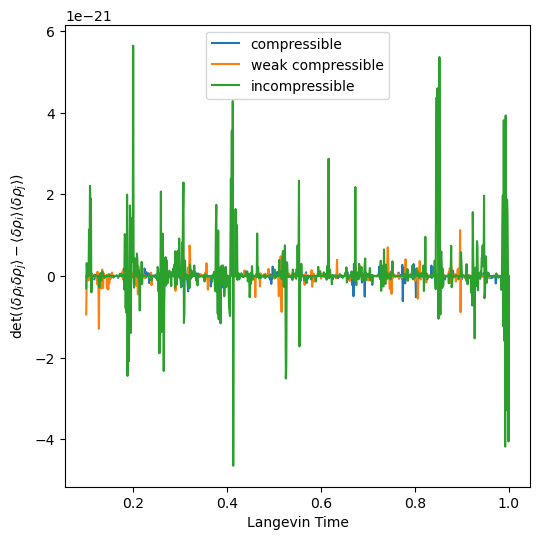

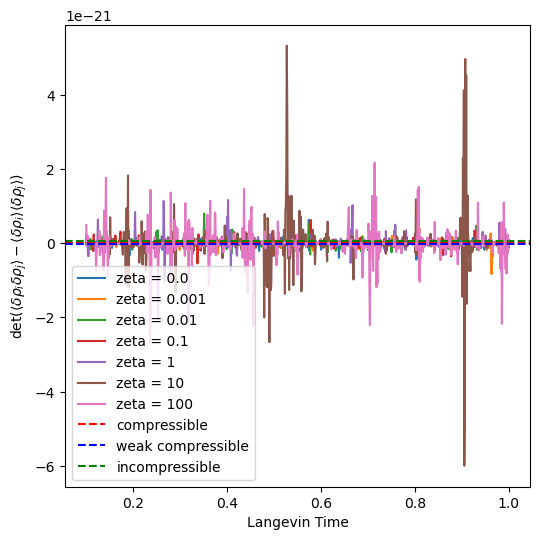

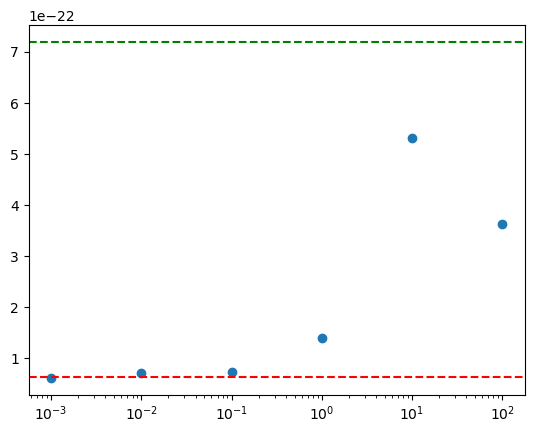

In [2]:
#process data get density profiles over time
# plot <density^2>-<density>^2
offset = 100
label = ['compressible','weak compressible','incompressible']
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
for i, corr in enumerate(corrlist):
    corr = np.array(corr)
    correlator = np.linalg.det(corr[offset:,:,:])
    print(np.std(correlator))

    plt.plot(t[offset:],np.linalg.det(corr[offset:,:,:]),label = label[i])
plt.legend()
plt.xlabel('Langevin Time')
plt.ylabel(r'$\det( \left<\delta\rho_i \delta\rho_j\right>-\left<\delta\rho_i\right> \left< \delta\rho_j\right>)$')
# plt.ylim(-1.0,1.0)



plt.figure(figsize = (6,6))
val = []
for i in range(len(corrlist_zeta)):
    corr = np.array(corrlist_zeta[i])
    correlator = np.linalg.det(corr[offset:,:,:])
    val.append(np.std(correlator)) 
    plt.plot(t[offset:],np.linalg.det(corr[offset:,:,:]),label = 'zeta = '+str(zetalist[i]))


color = ['r','b','g']
vals = []
for i, corr in enumerate(corrlist):
    corr = np.array(corr)
    correlator = np.linalg.det(corr[offset:,:,:])
    print(np.linalg.det(corr[-1,:,:]))
    vals.append(np.std(correlator))

    plt.axhline(np.mean(np.linalg.det(corr[offset:,:,:])),label = label[i],linestyle = '--',color = color[i])

plt.legend()
plt.xlabel('Langevin Time')
plt.ylabel(r'$\det( \left<\delta\rho_i \delta\rho_j\right>-\left<\delta\rho_i\right> \left< \delta\rho_j\right>)$')
# plt.ylim(-1.0,1.0)
    # plt.plot(t,corr[:,1,1])
plt.figure()
plt.scatter(zetalist,val)   
plt.axhline(vals[0],label = label[0],linestyle = '--',color = color[0])
plt.axhline(vals[-1],label = label[-1],linestyle = '--',color = color[-1])

plt.xscale('log') 

[0.e+00+0.j 1.e-03+0.j 1.e-02+0.j 1.e-01+0.j 1.e+00+0.j 1.e+01+0.j
 1.e+02+0.j]


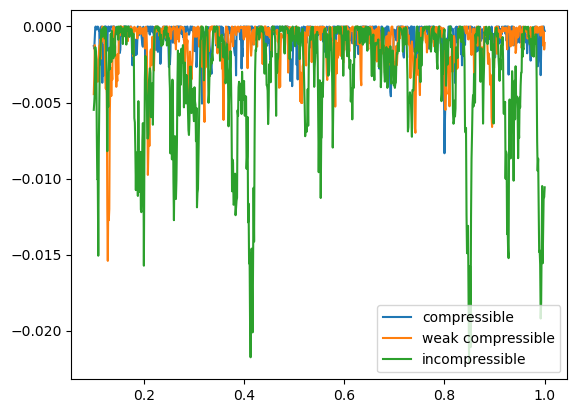

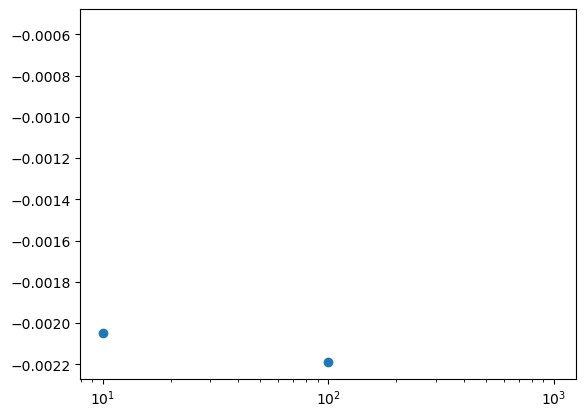

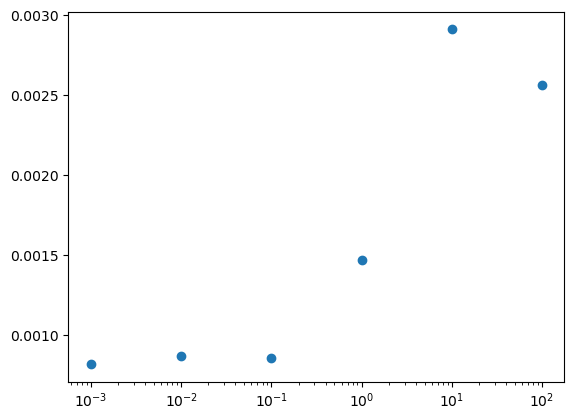

In [4]:
offset = 100

val = []

plt.figure()
value = [0,1.0,np.inf]
for i, corr in enumerate(corrlist_tot):
    corr = np.array(corr)
    plt.plot(t[offset:],corr[offset:],label = label[i])
    val.append(np.array([value[i],np.mean(corr[offset:]),np.std(corr[offset:])]))
plt.legend()

val = []
for i, corr in enumerate(corrlist_zeta_tot):
    corr = np.array(corr)
#    plt.plot(t[offset:],corr[offset:],label = 'zeta = '+str(zetalist[i]))
    val.append(np.array([zetalist[i],np.mean(corr[offset:]),np.std(corr[offset:])]))
val = np.vstack(val)
print(val[:,0])
plt.figure()
plt.scatter(val[:,0],val[:,1])
plt.xscale('log')

plt.figure()
plt.scatter(val[:,0],val[:,2])
plt.xscale('log')